<a href="https://colab.research.google.com/github/andrew-wairegi-school/core-week8-IP/blob/main/Moringa_Data_Science_Core_W8_Independent_Project_2021_12_Andrew_Wairegi_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nairobi hospital - Model Hypothyroid check 

In [1]:
# Github link: https://github.com/andrew-wairegi-school/core-week8-IP

By: Andrew Wairegi

**Definitions:**
*   Status - Condition of patient
*   Age - Age of patient
*   Sex - Gender
*   query_on_thyroxine - thyroxine drug queried
*   on_thyroxine - on the drug thyroxine
*   on_antithyroid_medication - on the antithyroid drug
*   thyroid_surgery - had thyroid surgery
*   query_hypothyroid - Query on hypothyroid
*   query_hyperthyroid - Query on hyperthyroid
*   pregnant - is pregnant
*   sick - is sick
*   tumor - has a tumor
*   lithium - contains lithium
*   goitre - has goitre
*   TSH_measured - TSH measured ?
*   TSH - TSH level
*   T3_measured - T3 measured ?
*   T3 - T3 level
*   TT4_measured - TT4 measured ?
*   TT4 - TT4 level
*   T4U_measured - T4U measured ?
*   T4U - T4U level
*   FTI_measured - FTI measured ?
*   FTI - FTI level
*   TBG_measured - TBG measured ?
*   TBG - TBG level




## 1. Defining the Question 

### a) Specifying the question

To create a model that willl be able to predict a hyperthyroid diagnosis in a patient. This will allow us to be able to predict hypothyroid in patients. Using diagnostic data that is available to the model.

### b) Defining Metric for success

A model that can predict the diagnosis of a patient using diagnostic data, and can reach an accuracy of 80% (macro).

### c) Understanding the context

The Nairobi hospital has been dealing with Hypothyroid patients, for several years. They want to create a model that will allow them to diagnose patients. With an accuracy of atleast 80%. This will allow them to diagnose patients quickly. Without the help of a specialist. As that would increase costs as well as time of diagnosises in the hospital.

### d) Experimental design

Process:

1. Defining the question
2. Data loading
3. Previewing data
4. Cleaning the data
5. Exploratory data analysis - EDA
6. Implementing the solution
7. Challenging the solution
8. Conclusion
9. Recommendation
10. Follow up questions

### e) Data relevance

The data is relevant because it has been sourced from Nairobi hospital. This means that it is valid data. As they did the test itself. It also means there should be fewer errors, as it is inhouse. Meaning that they would like to do it accurately. Therefore the data should be accurate.

## 2. Reading the data

In [2]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Reading the data
df = pd.read_csv("https://drive.google.com/uc?id=1JOuZ6TFh4BnNUg58eIw4qzldxmnJeOFD")
df.head(2)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?


## 3. Previewing the data

In [4]:
# Number of records
df.shape

(3163, 26)

In [5]:
# Top of dataset
df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [6]:
# Tail of dataset
df.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,?


In [7]:
# Checking datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

## 4. Cleaning the data

In [8]:
# 1. Checking for null values
df.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

In [9]:
# 2. Checking for duplicates
df.duplicated().sum()

77

In [10]:
# Since there's no Id it's possible that there are patients that 
# have the same characteristics but are actually different.

In [11]:
df["status"].unique()

array(['hypothyroid', 'negative'], dtype=object)

In [12]:
# 3. Data preparation
# a) converting string values
#    to numbers

In [13]:
df[["on_thyroxine", "on_antithyroid_medication", "thyroid_surgery", "query_hypothyroid", "query_hyperthyroid", "pregnant", "sick", "tumor", "lithium", "goitre"]] = df[["on_thyroxine", "on_antithyroid_medication", "thyroid_surgery", "query_hypothyroid", "query_hyperthyroid", "pregnant", "sick", "tumor", "lithium", "goitre"]].replace({"f": 0, "t": 1})

In [14]:
df["sex"] = df["sex"].replace({"M": 1, "F":0})

In [15]:
# b) filling in missing values

# Convert to numeric
df["TSH"] = pd.to_numeric(df['TSH'], errors='coerce')
df["T3"] = pd.to_numeric(df['T3'], errors='coerce')
df["T4U"] = pd.to_numeric(df['T4U'], errors='coerce')
df["TT4"] = pd.to_numeric(df['TT4'], errors='coerce')
df["FTI"] = pd.to_numeric(df['FTI'], errors='coerce')
df["TBG"] = pd.to_numeric(df['TBG'], errors='coerce')
df["age"] = pd.to_numeric(df['age'], errors='coerce')
df["sex"] = pd.to_numeric(df['sex'], errors='coerce')

# fill in with normal values
df["TSH"].fillna(value = 2.5, inplace = True)
df["T3"].fillna(value = 1.1, inplace = True)
df["T4U"].fillna(value = 0.9, inplace = True)
df["TT4"].fillna(value = 110, inplace = True)
df["FTI"].fillna(value = 80, inplace = True)
df["TBG"].fillna(value = 20, inplace = True)

# fill in with mean
df["age"].fillna(df["age"].mean(), inplace = True)

# dropping rows that can't be filled
df.dropna(axis = 0, subset = ["sex"], inplace = True)

# converting columns back to int datatype
df["age"] = df["age"].astype(int)
df["sex"] = df["sex"].astype(int)

In [16]:
# 4. Checking for outliers & anomalies
df["age"].max()

98

In [17]:
df["age"].min()

1

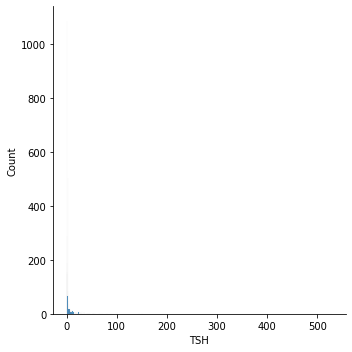

In [18]:
sns.displot(data = df, x = "TSH")

In [19]:
# They're very evenly distributed.
# So there may be no outliers, even if they're are values,
# way higher than the peak

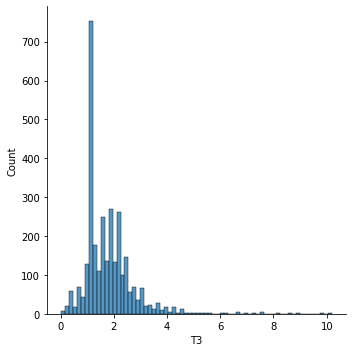

In [20]:
sns.displot(data = df, x = "T3")

In [21]:
# Not too abnormal. It's normal
# for people to within a certain range. While they are
# normal, then the abnormal ones are at a highr range

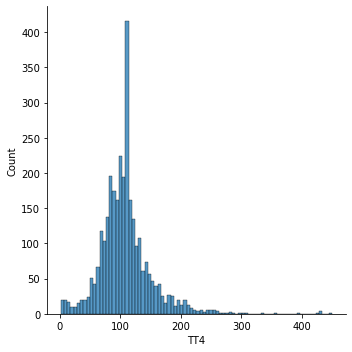

In [22]:
sns.displot(data = df, x = "TT4")

In [23]:
# Quite a normal distribution
# It seems to peak at 100, and spread outwards.
# However those values that are around 400. Are for
# very abnormal patients, which is ok

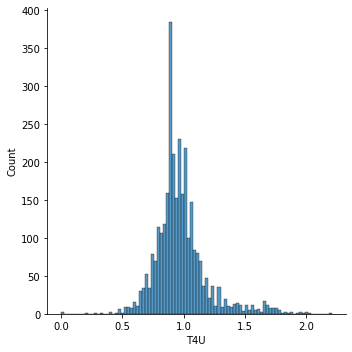

In [24]:
sns.displot(data = df, x = "T4U")

In [25]:
# Looks normal.
# As most of the values are within the
# normal limit

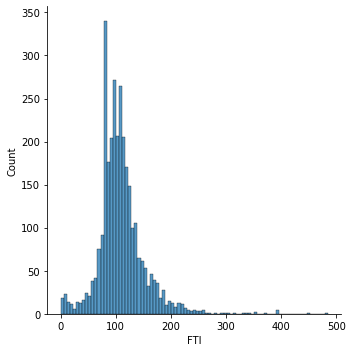

In [26]:
sns.displot(data = df, x = "FTI")

In [27]:
# This is also normal.
# However very high FTI values
# may be from abnormal patients.
# However, since they are still quite a few
# it may be normal.

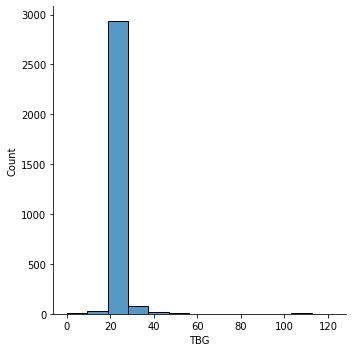

In [28]:
sns.displot(data = df, x = "TBG")

In [29]:
# Most patients had TBG values that were
# below 60. Which is ok, however those that were above
# 60 are still normal. Because several values were found over
# 100.

In [30]:
# 5. Trim string values

# Column names
df.columns = df.columns.str.strip()

In [31]:
# Column values
df[["status", "TSH_measured", "T3_measured", "TT4_measured", "T4U_measured", "FTI_measured", "TBG_measured"]] = df[["status", "TSH_measured", "T3_measured", "TT4_measured", "T4U_measured", "FTI_measured", "TBG_measured"]].applymap(str.strip)

In [32]:
# 6. Drop unneeded columns
df.drop(["on_thyroxine","query_on_thyroxine","TSH_measured", "T3_measured", "TT4_measured", "T4U_measured", "FTI_measured", "TBG_measured"], axis = 1, inplace = True)

In [33]:
# 7. Change column names
df.columns = df.columns.str.replace("_", " ")

## 5. Exploratory data analysis

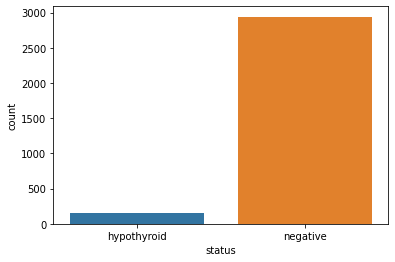

In [34]:
sns.countplot(data = df, x = "status")

In [35]:
# Most were negative.
# Which means we need to focus on the hypothyroid.
# In terms of it's distribution.

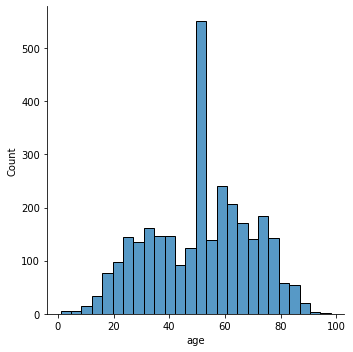

In [36]:
sns.displot(data = df, x = "age")

In [37]:
# Distribution of age.
# Remember some of them were imputed

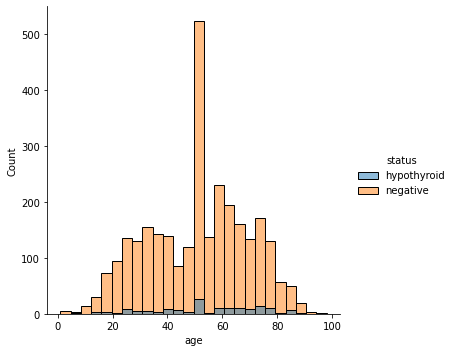

In [38]:
sns.displot(data = df, x = "age", hue = "status")

In [39]:
# Most of them were negative.
# However it's in accordance with the distribtion

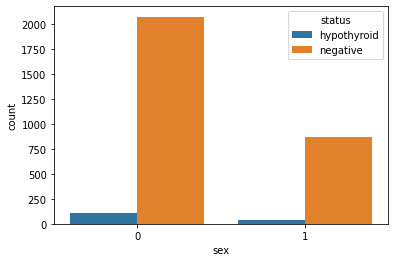

In [40]:
sns.countplot(data = df, x = "sex", hue = "status")

In [41]:
# Most were negative.
# However it appears you would be more likely
# to get hypothyroid if you were a girl.
# Than a man

In [42]:
# F - 0
# M - 1

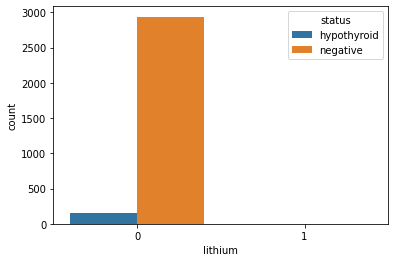

In [43]:
sns.countplot(data = df, x = "lithium", hue = "status")

In [44]:
df["lithium"].value_counts()

0    3088
1       2
Name: lithium, dtype: int64

In [45]:
# There were very few paitents who
# had lithium. This means that most people who had hypothyroid
# did not actually have lithium. Which means it may
# not be a cause

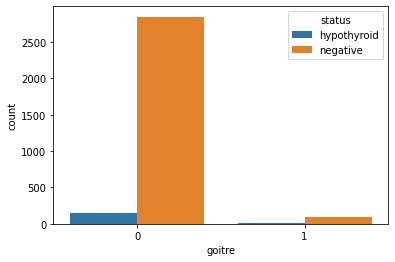

In [46]:
sns.countplot(data = df, x = "goitre", hue = "status")

In [47]:
# It seems that most people that didn't have
# hypothyroid did not have Goitre.
# However, if you had Goitre you were more likely
# to have hypothyroid.

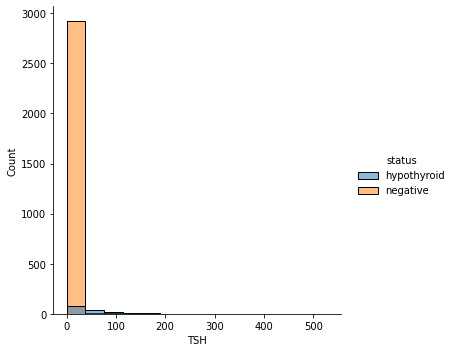

In [48]:
sns.displot(data = df, x = "TSH", bins = 14, hue = "status")

In [49]:
# Most were negative, however if you had higher
# TSH values. You were more likely to have
# hypothyroid

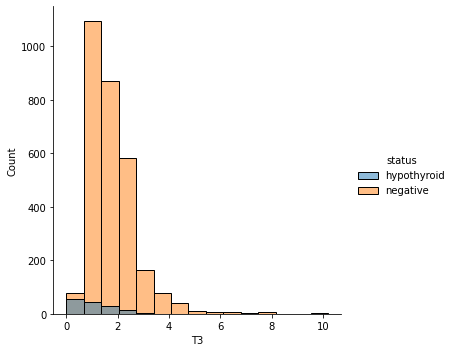

In [50]:
sns.displot(data = df, x = "T3", bins = 15, hue = "status")

In [51]:
# It seems lower T3 values
# meant a higher chance of hypothyroid
# contraction

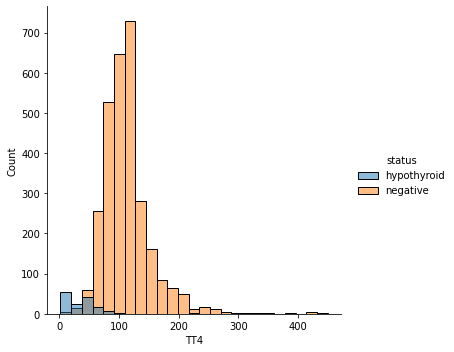

In [52]:
sns.displot(data = df, x = "TT4", bins = 25, hue = "status")

In [53]:
# It seems that lower values of TT4.
# Meant higher chances of hypothyroid.
# However, it was mainly focused on very low
# values of TT4.

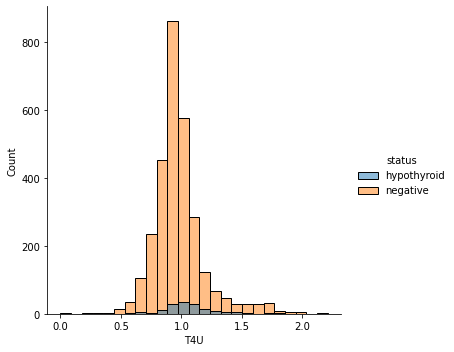

In [54]:
sns.displot(data = df, x = "T4U", bins = 25, hue = "status")

In [55]:
# It seems T4U values
# were generally the same
# for negative thyroid patoents.
# AAnd hypothyroid patients. Which means,
# it doesn't really change much.

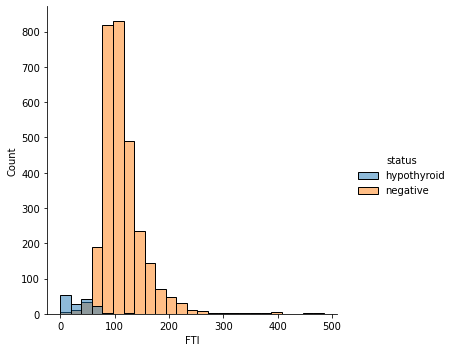

In [56]:
sns.displot(data = df, x = "FTI", bins = 25, hue = "status")

In [57]:
# Low values of FTI,
# meant you would have hypothyroid.
# However this was below the normal range. Which
# is what has been happening in most of the other insights.

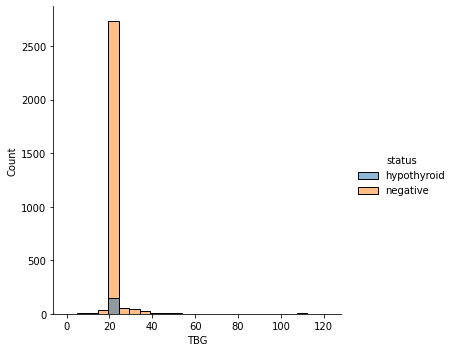

In [58]:
sns.displot(data = df, x = "TBG", bins = 25, hue = "status")

In [59]:
# It seems more hypothyroid patients,
# had normal values of TBG. However it was on the lower
# end. However we cannot see this. Because we imputed the missing TBG
# values with 20.

### Multivariate analysis

In [60]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

Selecting X

In [61]:
X = df.drop("status", axis = 1)

Scaling the data

In [62]:
standardScaler = StandardScaler()
standardScaler.fit(X)
X_scaled = standardScaler.transform(X)

Performing PCA

In [63]:
pca = PCA(n_components = 7)
pca.fit(X)
pca.components_

array([[-8.79931959e-03, -8.33437174e-04, -2.66501251e-05,
        -7.29838224e-05, -1.22536923e-04,  6.53191997e-04,
         2.14241493e-04, -7.86663738e-05, -3.32798425e-05,
        -4.74595030e-06,  6.64472580e-05, -1.52034495e-01,
         6.88051654e-03,  7.09407286e-01,  4.51559001e-04,
         6.88105676e-01, -3.34958035e-03],
       [-3.14946491e-01, -3.36457110e-03,  1.29865164e-04,
         9.24788051e-05,  6.65555147e-04,  9.28392265e-04,
         1.16101739e-03, -4.49174367e-04, -1.76120946e-05,
         1.45077256e-05,  2.50012497e-04,  8.37269702e-01,
         7.03187635e-03,  3.88444352e-01,  4.79578388e-03,
        -2.19459709e-01,  2.54924472e-02],
       [ 5.68027280e-01,  1.95513431e-03, -3.33217054e-04,
        -7.56058608e-05,  5.58226381e-04, -9.45438700e-04,
        -1.64565912e-03,  4.52084785e-04, -3.17250392e-04,
        -3.84843947e-05, -6.21611485e-04,  5.23044896e-01,
        -1.03713375e-02, -3.74814656e-01, -5.09020684e-03,
         5.09049192e-01, -6.3

Analysis

In [64]:
pca.explained_variance_ratio_

array([7.46912247e-01, 9.70333302e-02, 9.06442344e-02, 5.71710440e-02,
       7.99288601e-03, 1.40290997e-04, 4.25814076e-05])

In [65]:
sum(pca.explained_variance_ratio_)

0.9999366140897955

In [66]:
# Explains 99.99% of the variance.
# Which means we can use a simplified model of the
# data. With only 7 components, to make our models
# simpler. However we shall loose some complexity of the
# data. Also we may not get as much accuracy in the gradient
# descent of the model.

## 6. Implementing the solution

### Model preparation

Importing libraries

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report

Variables

In [68]:
model_predictions = []

X & Y

In [69]:
X = df.drop("status", axis = 1)
y = df["status"]

Train test split

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

### Decision trees

#### Basic tree

Modelling

In [71]:
decision_tree = DecisionTreeClassifier(max_depth = 14, random_state = 42)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=14, random_state=42)

Graph

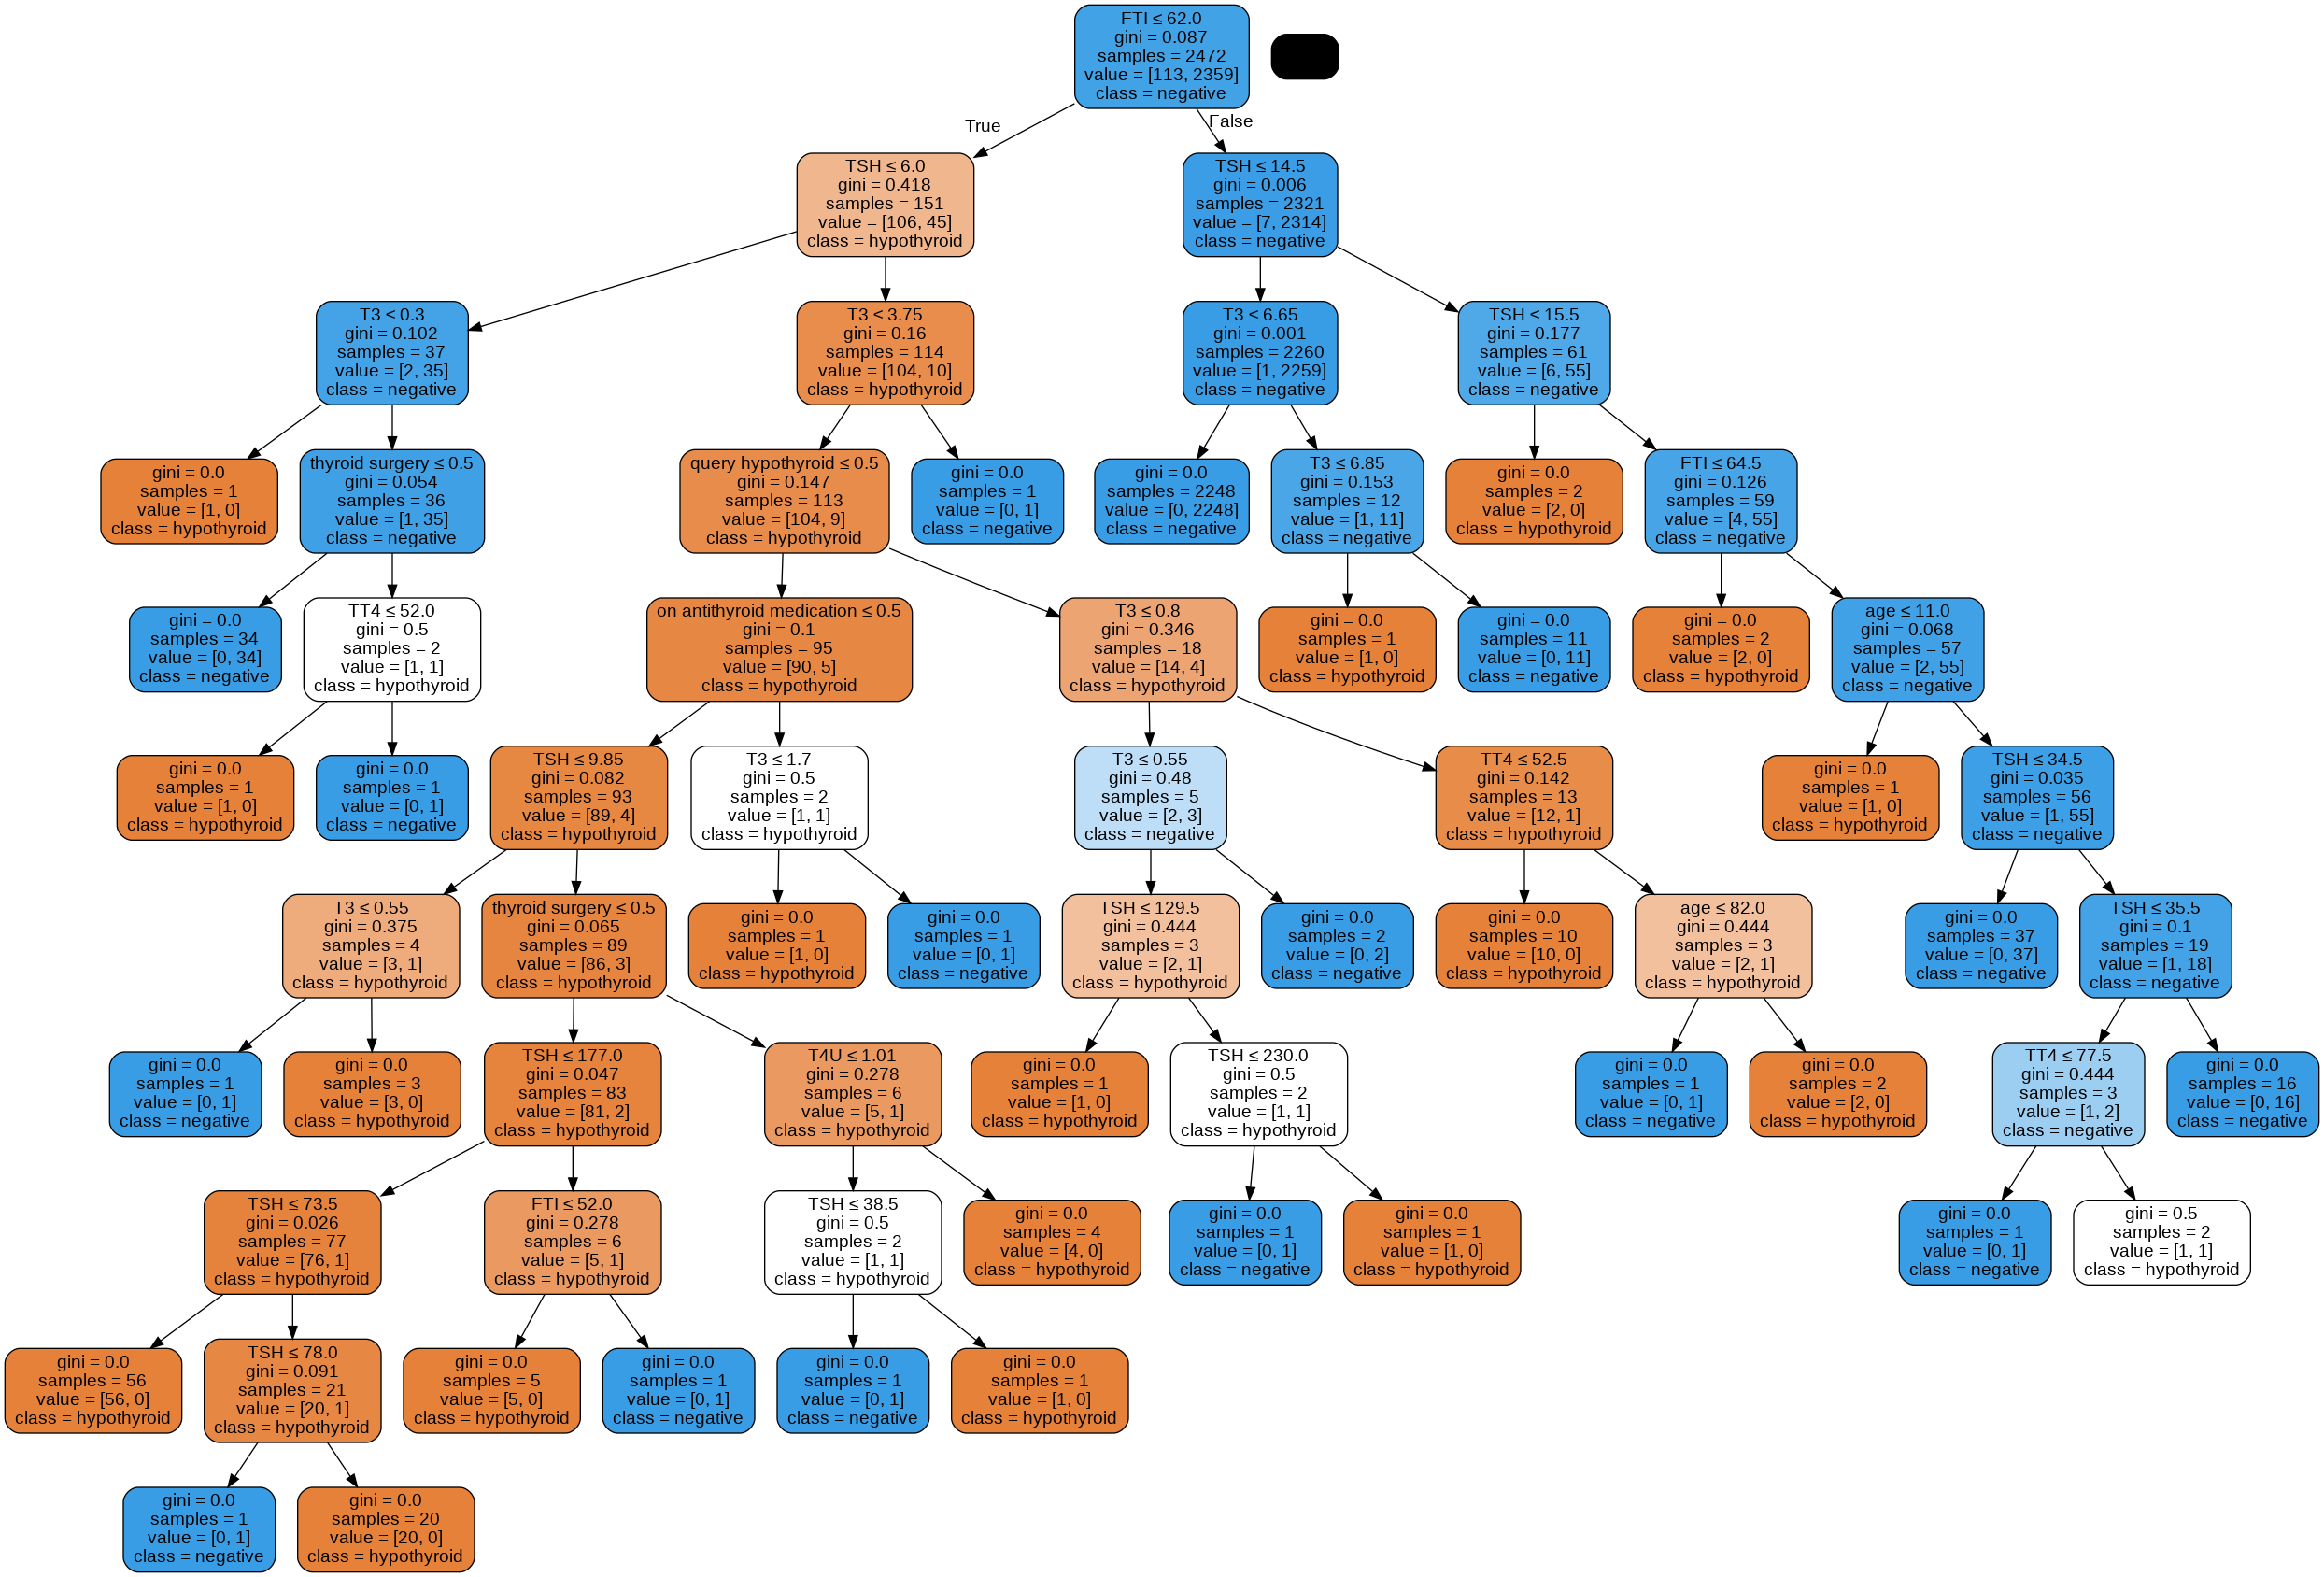

In [72]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(decision_tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns ,class_names=['hypothyroid', 'negative'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

Evaluation

In [73]:
predictions = decision_tree.predict(X_test)
model_predictions.append(predictions)

In [74]:
confusion_matrix(y_test, predictions)

array([[ 26,  10],
       [  6, 576]])

In [75]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

 hypothyroid       0.81      0.72      0.76        36
    negative       0.98      0.99      0.99       582

    accuracy                           0.97       618
   macro avg       0.90      0.86      0.88       618
weighted avg       0.97      0.97      0.97       618



Having a accuracy of 98% is good when predicting negative. However the hypothyroid accuracy is below it at 81%. Which is not bad, but is not as high as the negative accuracy.

#### Random Forest

Modelling

In [76]:
random_forest = RandomForestClassifier(n_estimators = 120, min_samples_split = 25, max_depth=14, random_state=42)
random_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=14, min_samples_split=25, n_estimators=120,
                       random_state=42)

Evaluation

In [77]:
predictions = random_forest.predict(X_test)
model_predictions.append(predictions)

In [78]:
confusion_matrix(y_test, predictions)

array([[ 25,  11],
       [  2, 580]])

In [79]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

 hypothyroid       0.93      0.69      0.79        36
    negative       0.98      1.00      0.99       582

    accuracy                           0.98       618
   macro avg       0.95      0.85      0.89       618
weighted avg       0.98      0.98      0.98       618



More accuracy has been acheived. However it may be more complex. However since it is just one tree. It might have gotten us a better balanced tree. Which means it will work well in real life.

AdaBoost

Modelling

In [81]:
ada_boost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=14),
                          n_estimators=400, random_state=101)

In [82]:
ada_boost = ada_boost.fit(X_train, y_train)

Evaluation

In [83]:
predictions = ada_boost.predict(X_test)

In [84]:
confusion_matrix(y_test, predictions)

array([[ 25,  11],
       [  7, 575]])

In [86]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

 hypothyroid       0.78      0.69      0.74        36
    negative       0.98      0.99      0.98       582

    accuracy                           0.97       618
   macro avg       0.88      0.84      0.86       618
weighted avg       0.97      0.97      0.97       618



This is a very high percentage. However, note that it is not as high as the SVM model below. As it only does 78% for predicting whether a patient will be hypothyroid. However it is still a good macro average of 88%. Which is good.

### SVM - Support vector machine

#### rbf kernel

Modelling

In [87]:
svc = SVC(kernel = "rbf")

In [88]:
svc.fit(X_train, y_train)

SVC()

Evaluation

In [89]:
predictions = svc.predict(X_test)
model_predictions.append(predictions)

In [90]:
confusion_matrix(y_test, predictions)

array([[ 23,  13],
       [  1, 581]])

In [91]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

 hypothyroid       0.96      0.64      0.77        36
    negative       0.98      1.00      0.99       582

    accuracy                           0.98       618
   macro avg       0.97      0.82      0.88       618
weighted avg       0.98      0.98      0.98       618



Very high accuracy - a high accuracy of over 90%. Means that the model is doing well in classification. It also means that it's boundaries of lines. Are actually good at predicting whether a person will have hypothyroid or not. Which is good for future predictions. As it means we have a clear boundary.

#### linear kernel

Modelling

In [92]:
svc = SVC(kernel = "linear")

In [93]:
svc.fit(X_train, y_train)

SVC(kernel='linear')

Evaluation

In [94]:
predictions = svc.predict(X_test)
model_predictions.append(predictions)

In [95]:
confusion_matrix(y_test, predictions)

array([[ 21,  15],
       [  1, 581]])

In [96]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

 hypothyroid       0.95      0.58      0.72        36
    negative       0.97      1.00      0.99       582

    accuracy                           0.97       618
   macro avg       0.96      0.79      0.86       618
weighted avg       0.97      0.97      0.97       618



The linear kernel has less complexity than the rbf kernel. However since, it's simple it will give us more precise results. But since a support vector machine is already simplified. It may be better to go with a rbf kernel.

#### polynomial kernel

Modelling

In [102]:
svc = SVC(kernel = "poly", degree = 3)

In [103]:
svc.fit(X_train, y_train)

SVC(kernel='poly')

Evaluation

In [104]:
predictions = svc.predict(X_test)
model_predictions.append(predictions)

In [105]:
confusion_matrix(y_test, predictions)

array([[ 22,  14],
       [  1, 581]])

In [106]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

 hypothyroid       0.96      0.61      0.75        36
    negative       0.98      1.00      0.99       582

    accuracy                           0.98       618
   macro avg       0.97      0.80      0.87       618
weighted avg       0.98      0.98      0.97       618



The polynomial support vector machine, is precise. Almost like the rbf kernel. However, it does not give us the same complexity as rbf kernel. As it creates complexity from teh same features, to achieve better seperation. This is why the rbf kernel may be better than the polynomial kernel. As it will allow us to be able to seperate features much more easily. Even with future data.

Best model: Support vector machine - RBF kernel

**Note:** there is no tuning for RBF. So I have not tuned it. Also there is no tuning for AdaBoost. I have already choosen the maximum number of trees. To allow it to pick the best tree, from a wide variety. So rbf is the best performing kernel.

## 7. Challenging the solution

I believe the support vector machine is better than the Decision tree. Because it is a simple classification problem. So if we are able to get better results with the support vector machine. Then it is better. Because we will be able to get clear accuracies from the model. As opposed to using a complex model. That will allow some errors. Without being fully accurate. This is why we should the support vector machine.

## 8. Conclusion

In conclusion I believe we can use the support vector machine. As it gives more accuracy. It also allows us to have more definite results later on. I also believe that by using the support vector machine, the doctors will be able to use one test to verify the results. Based on their belief of how likely they are to have hypothyroid. They also need to think however, whether the person may have hyperthyroid. So they may need another dataset in order to determine that.

## 9. Recommendation

I recommend that the Nairobi hospital team, use the support vector machine. As it will give them more accurate results. It will also be more specfic. As it knows from what point creates a more likelihood of having hypothyroid than the other. Also by using support vector machines, they will be able to create models that are more like what the doctor uses to create diagnoises. As he will think from one barrier to the other, this would cause Hypothyroid. That is why this is the best model for medical diagnosis.

## 10. Follow up questions

### a) Did we have the right data ?

Yes, we had the right data. As it was allowing us to classify diagnosis as accurately as over 80%. Which means that we had the right data. To answer the question.

### b) Do we need other data to answer our question ?

I believe that the doctors have provied us with enough data to answer our questions. As it has allowed us to gain an accuracy of over 90%. This means that we had the right data.

### c) Did we have the right question ?

Yes we had the right question. As we were able to answer it using the data that was provided. Also the doctors were writing this data, with the hopes of determining if a patient was hypothyroid positive or not.